#import lib and data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from scipy import stats
from datetime import datetime, date

#drop unnecessary variables

##dataframe 1

In [ ]:
df_1 = pd.read_csv("/content/drive/MyDrive/Task Intern/customer-myanmar/Customer_Info.xlsx - Customer Info.csv")

In [ ]:
df_1.head()

,CUSTOMER_ID,FULL_NAME,DOB,ONBOARDING_BRANCH_ID,ONBOARDING_BRANCH_NAME,NRC,FATHER_NAME,ADDRESS,ONBOARDING_TIME,ACCOUNT_STATUS,MARTIAL_STATUS
0,21249,ZEYAR NYUNT,5/28/1974,2,Ygn(41)_Novotel,12/BHATAHTA(N)000656,U NYUNT WIN MAUNG,"NO.(43/1),INYA MYAING ST,GOLDEN VALLEY (2),BAH...",6/30/2015,Close,Unknown
1,21258,KHIN MAUNG OO,8/7/1961,2,Ygn (1) Hlaing,KMYT002089,U THAUNG LWIN,- - SANCHAUNG YANGON(WEST) YANGON,1/16/2012,Close,Unknown
2,21434,SANJIV KUMAR,10/11/1966,2,Ygn(26)_KTD,12/KATATA(N)007899,U RAM ASRAY,"NO.43(B), 31ST,GROUND FLOOR, PABEDAN YANGON(W...",9/14/2017,Normal,Unknown
3,21438,WIN MIN THANT,2/15/1984,2,Mdy (9) 26 x 80 St,09/MAKHANA(N)182581,U THANT ZIN,ZA WA WA(205);HTAN TAPIN QTR;AHMARAPURA TSP;MD...,8/27/2020,Normal,Unknown
4,21441,MARLAR WIN,10/16/1975,2,Ygn(41)_Novotel,12/THAHGAKA(N)042538,U HLA WIN,"NO(65)B(1), MINDAMA HOUSING, MINDAMA ST, MAYAN...",6/5/2015,Close,Unknown


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115848 entries, 0 to 115847
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   CUSTOMER_ID             115848 non-null  int64 
 1   FULL_NAME               115848 non-null  object
 2   DOB                     112793 non-null  object
 3   ONBOARDING_BRANCH_ID    115848 non-null  int64 
 4   ONBOARDING_BRANCH_NAME  115848 non-null  object
 5   NRC                     115848 non-null  object
 6   FATHER_NAME             115072 non-null  object
 7   ADDRESS                 115689 non-null  object
 8   ONBOARDING_TIME         115848 non-null  object
 9   ACCOUNT_STATUS          115848 non-null  object
 10  MARTIAL_STATUS          115848 non-null  object
dtypes: int64(2), object(9)
memory usage: 9.7+ MB


In [ ]:
df_1.nunique().sort_values()

ACCOUNT_STATUS                3
MARTIAL_STATUS                5
ONBOARDING_BRANCH_NAME      252
ONBOARDING_BRANCH_ID        262
ONBOARDING_TIME            2209
DOB                       17254
FATHER_NAME               18643
FULL_NAME                 38306
ADDRESS                   83299
NRC                       84688
CUSTOMER_ID               84689
dtype: int64

In [ ]:
df_1.drop(columns = ['FULL_NAME'], axis = 1, inplace=True)
df_1.drop(columns = ['FATHER_NAME'], axis = 1, inplace=True)
df_1.drop(columns = ['ADDRESS'], axis = 1, inplace=True)
df_1.drop(columns = ['NRC'], axis = 1, inplace=True)
df_1.drop(columns = ['ONBOARDING_TIME'], axis = 1, inplace=True)
df_1 = df_1.rename(columns={'CUSTOMER_ID': 'CUSTOMERID'})
df_1.drop_duplicates(subset = ['CUSTOMERID'], keep='last', inplace=True)

In [ ]:
df_1 = df_1.dropna()
df_1['DOB'] = df_1['DOB'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
def age(born):
    born = datetime.strptime(born, "%m/%d/%Y").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
  
df_1['Age'] = df_1['DOB'].apply(age)

df_1.drop(columns = ["DOB"], inplace = True)

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82335 entries, 0 to 115847
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CUSTOMERID              82335 non-null  int64 
 1   ONBOARDING_BRANCH_ID    82335 non-null  int64 
 2   ONBOARDING_BRANCH_NAME  82335 non-null  object
 3   ACCOUNT_STATUS          82335 non-null  object
 4   MARTIAL_STATUS          82335 non-null  object
 5   Age                     82335 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 4.4+ MB


In [ ]:
df_1.head()

,CUSTOMERID,ONBOARDING_BRANCH_ID,ONBOARDING_BRANCH_NAME,ACCOUNT_STATUS,MARTIAL_STATUS,Age
0,21249,2,Ygn(41)_Novotel,Close,Unknown,48
1,21258,2,Ygn (1) Hlaing,Close,Unknown,61
2,21434,2,Ygn(26)_KTD,Normal,Unknown,55
3,21438,2,Mdy (9) 26 x 80 St,Normal,Unknown,38
4,21441,2,Ygn(41)_Novotel,Close,Unknown,46


In [ ]:
df_1.shape

(82335, 6)

In [ ]:
df_1.isnull().values.any()

False

In [ ]:
lb_make = LabelEncoder()
df_1["ONBOARDING_BRANCH_NAME"] = lb_make.fit_transform(df_1["ONBOARDING_BRANCH_NAME"])
df_1["MARTIAL_STATUS"] = lb_make.fit_transform(df_1["MARTIAL_STATUS"])
df_1["ACCOUNT_STATUS"] = lb_make.fit_transform(df_1["ACCOUNT_STATUS"])

In [ ]:
df_1.head()

,CUSTOMERID,ONBOARDING_BRANCH_ID,ONBOARDING_BRANCH_NAME,ACCOUNT_STATUS,MARTIAL_STATUS,Age
0,21249,2,194,0,3,48
1,21258,2,164,0,3,61
2,21434,2,180,1,3,55
3,21438,2,66,1,3,38
4,21441,2,194,0,3,46


In [ ]:
df_1.describe()

,CUSTOMERID,ONBOARDING_BRANCH_ID,ONBOARDING_BRANCH_NAME,ACCOUNT_STATUS,MARTIAL_STATUS,Age
count,8.233500e+04,82335.000000,82335.000000,82335.000000,82335.000000,82335.000000
mean,7.943962e+05,164.423417,110.605915,0.183154,2.793223,41.552535
std,7.234610e+05,918.841078,62.737835,0.386952,0.548835,13.040599
min,5.298000e+03,1.000000,0.000000,0.000000,0.000000,3.000000
25%,2.371005e+05,14.000000,61.000000,0.000000,3.000000,32.000000
50%,4.793160e+05,35.000000,113.000000,0.000000,3.000000,39.000000
75%,1.233588e+06,86.000000,164.000000,0.000000,3.000000,49.000000
max,2.888622e+06,8002.000000,251.000000,2.000000,4.000000,122.000000


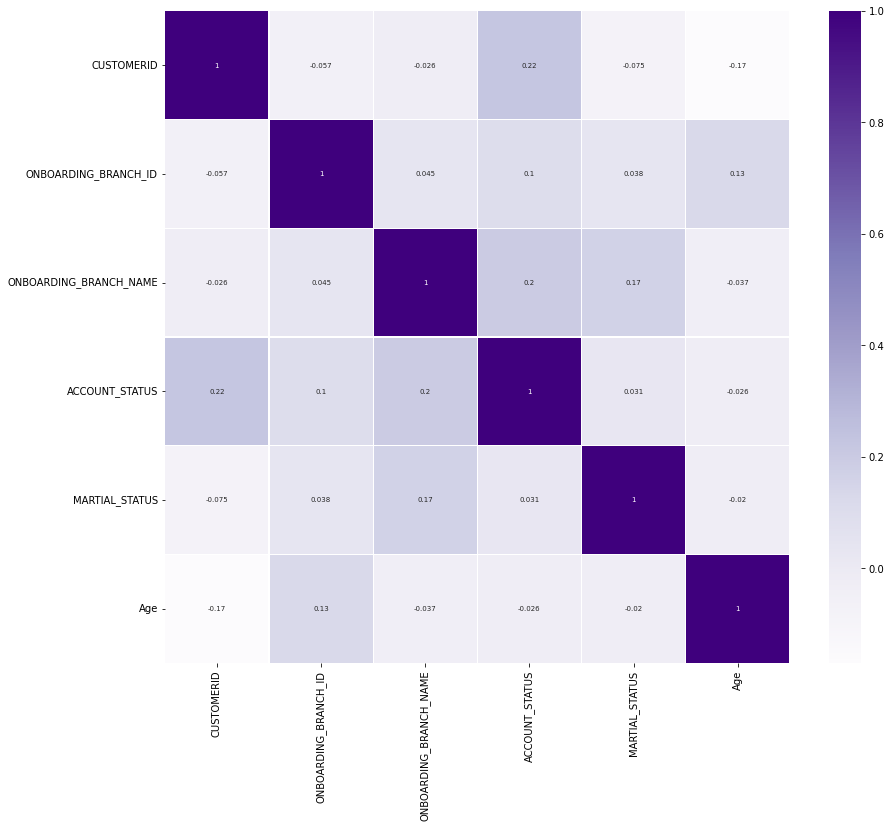

In [ ]:
plt.figure(figsize=(14,12))
sns.heatmap(df_1.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);

##dataframe 2


In [ ]:
df_2 = pd.read_csv("/content/drive/MyDrive/Task Intern/customer-myanmar/Customer_account_transaction_history.xlsx - Export Worksheet.csv")

In [ ]:
df_2.head()

,CUSTOMERID,TXDT,DEBIT_ACCOUNT_ID,CREDIT_ACCOUNT_ID,BALANCE,CURRENCY_CODE,DESCRIPTION
0,865172,5/4/2020 7:53 SA,NaN,112708010754947,0,MMK,Repayment interest: From 0112330010002663 to: ...
1,171703,5/4/2020 9:49 SA,NaN,136702010817033,0,MMK,payment for
2,9562,5/4/2020 1:04 CH,NaN,112702010821366,0,MMK,N TO PYONE/Int
3,9562,5/4/2020 1:15 CH,NaN,112702010821366,0,MMK,N TO G1 Disel
4,9562,5/4/2020 1:59 CH,NaN,112702010821366,0,MMK,N TO YU INT+ Su


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323717 entries, 0 to 323716
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CUSTOMERID         323717 non-null  int64  
 1   TXDT               323717 non-null  object 
 2   DEBIT_ACCOUNT_ID   195536 non-null  float64
 3   CREDIT_ACCOUNT_ID  323717 non-null  int64  
 4   BALANCE            323717 non-null  object 
 5   CURRENCY_CODE      323717 non-null  object 
 6   DESCRIPTION        323709 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 17.3+ MB


In [ ]:
df_2.nunique().sort_values()

CURRENCY_CODE            1
BALANCE              17690
DEBIT_ACCOUNT_ID     25911
CUSTOMERID           30091
CREDIT_ACCOUNT_ID    36274
TXDT                 55576
DESCRIPTION          90642
dtype: int64

In [ ]:
df_2.drop(columns = ['CURRENCY_CODE'], axis = 1, inplace=True)
df_2.drop(columns = ['DESCRIPTION'], axis = 1, inplace=True)
df_2.drop(columns = ['DEBIT_ACCOUNT_ID'], axis = 1, inplace=True)
df_2.drop(columns = ['TXDT'], axis = 1, inplace=True)
df_2.drop(columns = ['CREDIT_ACCOUNT_ID'], axis = 1, inplace=True)
df_2.drop_duplicates(subset = ['CUSTOMERID'], keep=False, inplace=True)

In [ ]:
df_2.shape

(2942, 2)

In [ ]:
df_2.isnull().values.any()

False

##dataframe 3

In [ ]:
df_3 = pd.read_csv("/content/drive/MyDrive/Task Intern/customer-myanmar/Loan_information.xlsx - Export Worksheet.csv")

In [ ]:
df_3.head()

,Debit ACNO,CREDIT_ACNO,CUSTOMERID,CUSTOMER_TYPE,CATEGORYID,CATNAME,CRD_PURPOSE,CRD_CLASSIFICATION,CRLIMIT,DISBURSEMENT_AMT,...,WEEK_DEBIT,WEEK_CREDIT,MONTH_DEBIT,MONTH_CREDIT,QUATER_DEBIT,QUATER_CREDIT,SEMI_ANNUAL_DEBIT,SEMI_ANNUAL_CREDIT,YEAR_DEBIT,YEAR_CREDIT
0,1.121010e+12,1801010612245,1256754,Single Customer,1067,Hire Purchase (Upfront Method) Int 7%,Electronic Equipments,Agriculture/Livestocks,413700,413700,...,413700,"275859,87",413700,"275859,87",413700,"275859,87",413700,"275859,87",413700,"275859,87"
1,1.121010e+12,1801010612261,1617517,Single Customer,1067,Hire Purchase (Upfront Method) Int 7%,Electronic Equipments,Agriculture/Livestocks,595000,595000,...,595000,"396710,2",595000,"396710,2",595000,"396710,2",595000,"396710,2",595000,"396710,2"
2,1.121010e+12,1801010614829,1308040,Single Customer,1067,Hire Purchase (Upfront Method) Int 7%,Electronic Equipments,Agriculture/Livestocks,560000,560000,...,560000,"373562,65",560000,"373562,65",560000,"373562,65",560000,"373562,65",560000,"373562,65"
3,1.121010e+12,1801010630319,1384971,Single Customer,1067,Hire Purchase (Upfront Method) Int 7%,Electronic Equipments,Agriculture/Livestocks,559300,559300,...,559300,"356425,47",559300,"356425,47",559300,"356425,47",559300,"356425,47",559300,"356425,47"
4,1.121010e+12,1801010630322,1660930,Single Customer,1067,Hire Purchase (Upfront Method) Int 7%,Electronic Equipments,Agriculture/Livestocks,707000,707000,...,707000,"450115,05",707000,"450115,05",707000,"450115,05",707000,"450115,05",707000,"450115,05"


In [ ]:
df_3.shape

(15005, 57)

In [ ]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15005 entries, 0 to 15004
Data columns (total 57 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Debit ACNO                      14945 non-null  float64
 1   CREDIT_ACNO                     15005 non-null  int64  
 2   CUSTOMERID                      15005 non-null  int64  
 3   CUSTOMER_TYPE                   15005 non-null  object 
 4   CATEGORYID                      15005 non-null  int64  
 5   CATNAME                         15005 non-null  object 
 6   CRD_PURPOSE                     15005 non-null  object 
 7   CRD_CLASSIFICATION              15005 non-null  object 
 8   CRLIMIT                         15005 non-null  object 
 9   DISBURSEMENT_AMT                15005 non-null  object 
 10  NORMAL_PRINCIPAL_AMT            15005 non-null  object 
 11  PRINCIPAL_AMT                   15005 non-null  object 
 12  FIRSTDATE_OF_PRINCIPAL_PAYMENT  

In [ ]:
df_3.nunique().sort_values()

CLSDT                                 0
CRD_CLASSIFICATION                    1
ASDATE                                1
CUSTOMER_TYPE                         3
NPL_STATUS                            5
CRD_PURPOSE                           9
Down_payment%                        20
CATNAME                              28
CATEGORYID                           29
FIRSTDAY_OF_INTEREST_PAYMENT         31
PRINCIPAL_PAY_DAY                    31
TIMES                                36
BRNAME                              206
DEALER_NAME                         258
VEXPRIREDATE                        323
NPL_DAYS                            424
MIN_DUEDT                           692
MIN_NPL_DAYS                        692
INTEREST_PREPAID                    772
OPNDT                               868
FIRSTDATE_OF_PRINCIPAL_PAYMENT      905
FIRSTDATE_OF_INTEREST_PAYMENT       939
LAST_REPAYMENT_DATE                1659
END_OF_TENOR                       2165
Down payment amount                2997


In [ ]:
# NPL_S = df_3.pop("NPL_STATUS")
# df_3 = df_3.insert(0, "NPL_STATUS", NPL_S)

In [ ]:
df_3.drop_duplicates(subset = ['CUSTOMERID'], keep=False, inplace=True)

In [ ]:
# df_3.drop(columns = ['CLSDT'], axis = 1, inplace=True)
# df_3.drop(columns = ['CRD_CLASSIFICATION'], axis = 1, inplace=True)
# df_3.drop(columns = ['ASDATE'], axis = 1, inplace=True)
# df_3.drop(columns = ['NRC_NO'], axis = 1, inplace=True)
# df_3.drop(columns = ['ADDRESS'], axis = 1, inplace=True)
# df_3.drop(columns = ['PHONE'], axis = 1, inplace=True)
# df_3.drop(columns = ['Debit ACNO'], axis = 1, inplace=True)
# df_3.drop(columns = ['FIRSTDAY_OF_INTEREST_PAYMENT'], axis = 1, inplace=True)
# df_3.drop(columns = ['BRNAME'], axis = 1, inplace=True)
# df_3.drop(columns = ['DISBURSEMENT_AMT'], axis = 1, inplace=True)

# df_3.drop(columns = ['WEEK_DEBIT'], axis = 1, inplace=True)
# df_3.drop(columns = ['MONTH_DEBIT'], axis = 1, inplace=True)
# df_3.drop(columns = ['QUATER_DEBIT'], axis = 1, inplace=True)
# df_3.drop(columns = ['SEMI_ANNUAL_DEBIT'], axis = 1, inplace=True)
# df_3.drop(columns = ['YEAR_DEBIT'], axis = 1, inplace=True)

# df_3.drop(columns = ['WEEK_CREDIT'], axis = 1, inplace=True)
# df_3.drop(columns = ['MONTH_CREDIT'], axis = 1, inplace=True)
# df_3.drop(columns = ['QUATER_CREDIT'], axis = 1, inplace=True)
# df_3.drop(columns = ['SEMI_ANNUAL_CREDIT'], axis = 1, inplace=True)
# df_3.drop(columns = ['YEAR_CREDIT'], axis = 1, inplace=True)

In [ ]:
df_3['NPL_STATUS'].unique()

array(['Bad Debt', 'Doubtful', 'Sub-Standard', 'Standard', 'Watch'],
      dtype=object)

In [ ]:
df_3['NPL_STATUS'] = df_3['NPL_STATUS'].map({'Bad Debt' :0 , 'Doubtful':0, 'Sub-Standard' :0, 'Standard':1, 'Watch':1})

In [ ]:
df_3 = df_3.apply(LabelEncoder().fit_transform)

In [ ]:
df_3.drop(columns = ['ASDATE'], axis = 1, inplace=True)
df_3.drop(columns = ['CRD_CLASSIFICATION'], axis = 1, inplace=True)
df_3.drop(columns = ['CLSDT'], axis = 1, inplace=True)

In [ ]:
corr_matrix = df_3.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

# Drop features 
df_3.drop(to_drop, axis=1, inplace=True)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


In [ ]:
# plt.figure(figsize=(22,16))
# sns.heatmap(df_3.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 10})
# plt.yticks(rotation=0);

In [ ]:
NPL_S = df_3.pop('NPL_STATUS')
df_3.insert(0, 'NPL_STATUS', NPL_S)

In [ ]:
df_3.head()

,NPL_STATUS,Debit ACNO,CUSTOMERID,CUSTOMER_TYPE,CATEGORYID,CATNAME,CRD_PURPOSE,CRLIMIT,NORMAL_PRINCIPAL_AMT,PRINCIPAL_AMT,...,LAST_REPAYMENT_DATE,LAST_REPAYMENT_AMOUNT,INTEREST,PI,FEE_OUTSTANDING,VEXPRIREDATE,OPNDT,ORIGINAL_AMT,Down_payment%,Down payment amount
0,0,1,8023,2,17,26,3,4011,2047,4887,...,390,9496,0,1737,773,284,228,4065,5,861
1,0,2,9023,2,17,26,3,4742,5866,6854,...,390,7665,0,3952,2336,284,228,4771,5,1324
2,0,3,8165,2,17,26,3,4606,5234,6516,...,81,10025,0,3600,1879,280,426,4652,5,1247
3,0,5,8379,2,17,26,3,4601,6076,6267,...,81,12034,0,4100,2256,281,400,4648,5,1245
4,0,4,9151,2,17,26,3,5092,7730,7592,...,314,3166,0,5270,3057,281,400,21,5,1546


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

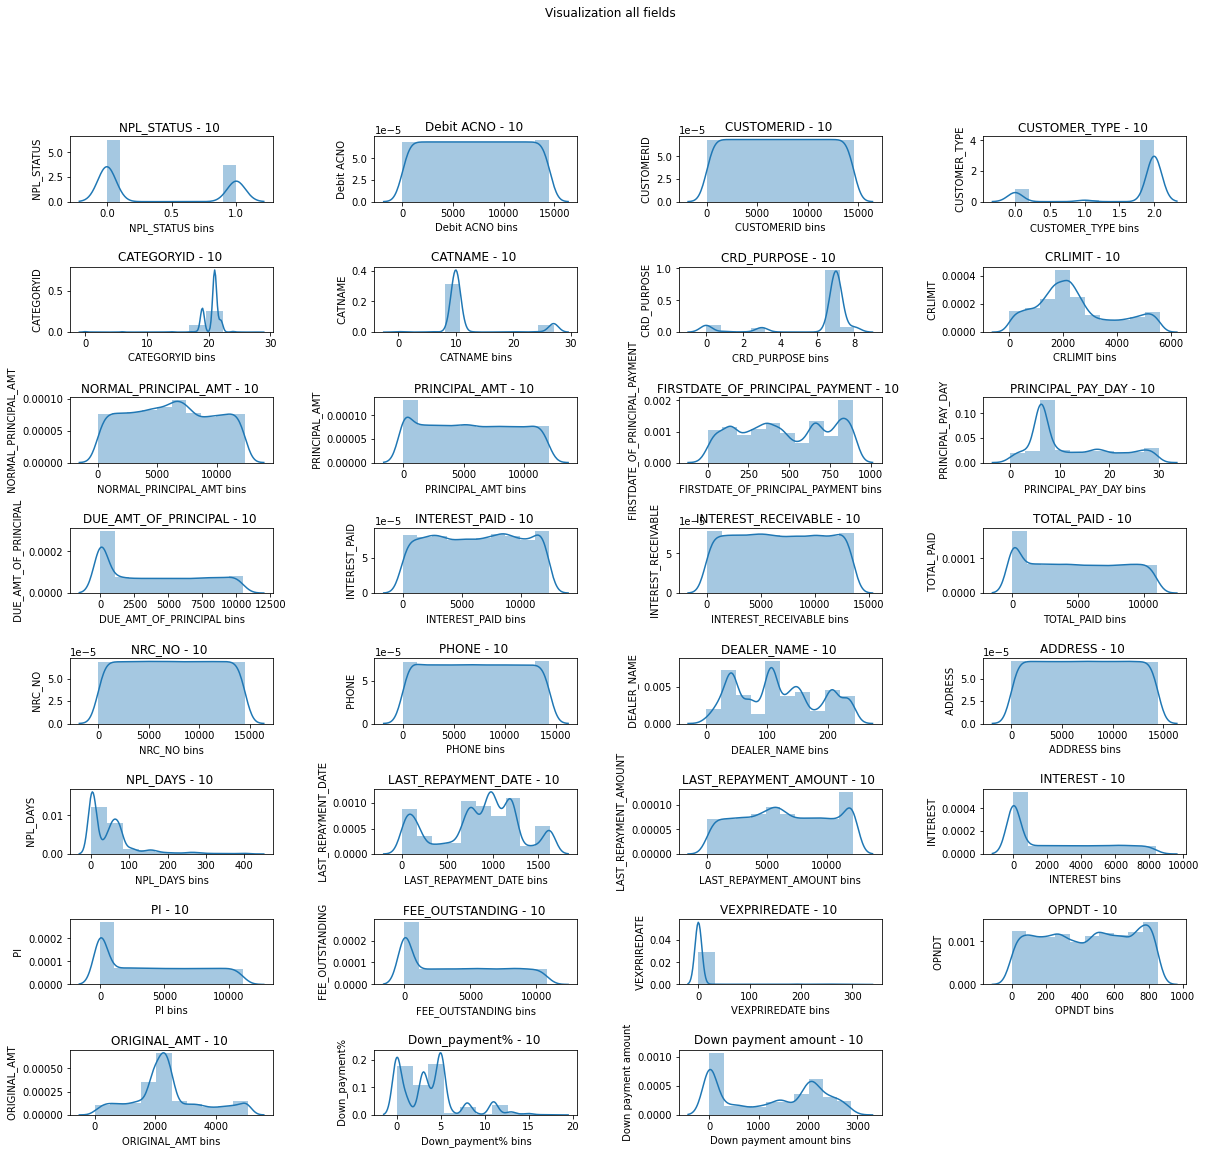

In [ ]:
def _plot_hist_subplot(x, fieldname, bins = 10, use_kde = True):
  x = x.dropna()
  xlabel = '{} bins'.format(fieldname)
  ylabel = ' {} '.format(fieldname)
  title = '{} - {} '.format(fieldname, bins)
  ax = sns.distplot(x, bins = bins, kde = use_kde)
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  ax.set_title(title)
  return ax

# Biểu đồ barchart
def _plot_barchart_subplot(x, fieldname):
  xlabel = '{}'.format(fieldname)
  ylabel = '{} '.format(fieldname)
  title = '{}'.format(fieldname)
  x = x.fillna('Missing')
  df_summary = x.value_counts(dropna = False)
  y_values = df_summary.values
  x_index = df_summary.index
  ax = sns.barplot(x = x_index, y = y_values, order = x_index)
  # Tạo vòng for lấy tọa độ đỉnh trên cùng của biểu đồ và thêm label thông qua annotate.
  labels = list(set(x))
  for label, p in zip(y_values, ax.patches):
    ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.15))
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  return ax

# Khởi tạo figure cho đồ thị (Kích thước W*H = 16x12) và cách nhau là 0.2 giữa các đồ thị
fig = plt.figure(figsize=(20, 18))
fig.subplots_adjust(hspace=1, wspace=0.5)
# Tạo vòng for check định dạng của biến và visualize
for i, (fieldname, dtype) in enumerate(zip(df_3.columns, df_3.dtypes.values)):
  if i <= 31:
    ax_i = fig.add_subplot(8, 4, i+1)
    if dtype in ['float64', 'int64']:
      ax_i = _plot_hist_subplot(df_3[fieldname], fieldname=fieldname)
    else:
      ax_i = _plot_barchart_subplot(df_3[fieldname], fieldname=fieldname)
 
      
fig.suptitle('Visualization all fields')
plt.show()

In [ ]:
df = df_3

#bin range

In [ ]:
MAX_VAL = 999999999
MIN_VAL = -MAX_VAL

def _bin_table(data, colname, n_bins = 10, qcut = None):
  X = data[[colname, 'NPL_STATUS']]
  X = X.sort_values(colname)
  coltype = X[colname].dtype

  if coltype in ['float', 'int']:
    if qcut is None:
      try:
        bins, thres = pd.qcut(X[colname], q = n_bins, retbins=True, duplicates='drop')
        # Thay thế threshold đầu và cuối của thres
        thres[0] = MIN_VAL
        thres[-1] = MAX_VAL
        bins, thres = pd.cut(X[colname], bins=thres, retbins=True)
        X['bins'] = bins
      except:
        print('n_bins must be lower to bin interval is valid!')
    else:
      bins, thres = pd.cut(X[colname], bins=qcut, retbins=True)
      X['bins'] = bins
  elif coltype == 'object':
    X['bins'] = X[colname]

  df_GB = pd.pivot_table(X, 
                index = ['bins'],
                values = ['NPL_STATUS'],
                columns = ['NPL_STATUS'],
                aggfunc = {
                    'NPL_STATUS':np.size
                })

  df_Count = pd.pivot_table(X, 
                index = ['bins'],
                values = ['NPL_STATUS'],
                aggfunc = {
                    'NPL_STATUS': np.size
                })
  
  if coltype in ['float', 'int']:
    df_Thres = pd.DataFrame({'Thres':thres[1:]}, index=df_GB.index)
  elif coltype == 'object':
    df_Thres = pd.DataFrame(index=df_GB.index)
    thres = None
  df_Count.columns = ['No_Obs']
  df_GB.columns = ['#BAD', '#GOOD']
  df_summary = df_Thres.join(df_Count).join(df_GB)
  return df_summary, thres


#WOE

In [ ]:
def _WOE(data, colname, n_bins = None, min_obs = 100, qcut = None):
  # Thống kê bins và lấy ra thres hold ban đầu
  df_summary, thres = _bin_table(data, colname, n_bins = n_bins, qcut = qcut)
  # Thay thế giá trị 0 của #BAD trong df_summary bằng 1 để không bị lỗi chia cho 0
  df_summary['#BAD'] = df_summary['#BAD'].replace({0:1})
  
  if qcut is not None:
    # Lọc bỏ threshold để tạo thành threshold mới mà thỏa mãn số lượng quan sát >= min_obs
    exclude_ind = np.where(df_summary['No_Obs'] <= min_obs)[0]
    if exclude_ind.shape[0] > 0:
      new_thres = np.delete(thres, exclude_ind)
      print('Auto combine {} bins into {} bins'.format(n_bins, new_thres.shape[0]-1))
      # Tính toán lại bảng summary
      df_summary, thres = _bin_table(data, colname, qcut=new_thres)
  
  new_thres = thres
  df_summary['GOOD/BAD'] = df_summary['#GOOD']/df_summary['#BAD']
  df_summary['%BAD'] = df_summary['#BAD']/df_summary['#BAD'].sum()
  df_summary['%GOOD'] = df_summary['#GOOD']/df_summary['#GOOD'].sum()
  df_summary['WOE'] = np.log(df_summary['%GOOD']/df_summary['%BAD'])
  df_summary['IV'] = (df_summary['%GOOD']-df_summary['%BAD'])*df_summary['WOE']
  df_summary['COLUMN'] = colname
  IV = df_summary['IV'].sum()
  print('Information Value of {} column: {}'.format(colname, IV))
  return df_summary, IV, new_thres

df_summary, IV, thres = _WOE(df, 'Debit ACNO', n_bins = 7, min_obs= 100)
df_summary

Information Value of Debit ACNO column: 0.028647416633231088


,Thres,No_Obs,#BAD,#GOOD,GOOD/BAD,%BAD,%GOOD,WOE,IV,COLUMN
bins,,,,,,,,,,
"(-999999999.0, 2081.286]",2.081286e+03,2082,1377,705,0.511983,0.149951,0.130871,-0.136099,0.002597,Debit ACNO
"(2081.286, 4162.571]",4.162571e+03,2081,1351,730,0.540340,0.147120,0.135511,-0.082190,0.000954,Debit ACNO
"(4162.571, 6243.857]",6.243857e+03,2081,1251,830,0.663469,0.136230,0.154075,0.123092,0.002197,Debit ACNO
"(6243.857, 8325.143]",8.325143e+03,2082,1291,791,0.612703,0.140586,0.146835,0.043491,0.000272,Debit ACNO
"(8325.143, 10406.429]",1.040643e+04,2081,1277,804,0.629601,0.139061,0.149248,0.070696,0.000720,Debit ACNO
"(10406.429, 12487.714]",1.248771e+04,2081,1451,630,0.434183,0.158009,0.116948,-0.300923,0.012356,Debit ACNO
"(12487.714, 999999999.0]",1.000000e+09,2082,1185,897,0.756962,0.129043,0.166512,0.254923,0.009552,Debit ACNO


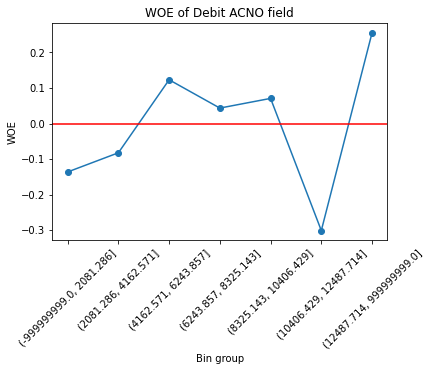

In [ ]:
def _plot(df_summary):
  colname = list(df_summary['COLUMN'].unique())[0]
  df_summary['WOE'].plot(linestyle='-', marker='o')
  plt.title('WOE of {} field'.format(colname))
  plt.axhline(y=0, color = 'red')
  plt.xticks(rotation=45)
  plt.ylabel('WOE')
  plt.xlabel('Bin group')

_plot(df_summary)

In [ ]:
df.columns

Index(['NPL_STATUS', 'Debit ACNO', 'CUSTOMERID', 'CUSTOMER_TYPE', 'CATEGORYID',
       'CATNAME', 'CRD_PURPOSE', 'CRLIMIT', 'NORMAL_PRINCIPAL_AMT',
       'PRINCIPAL_AMT', 'FIRSTDATE_OF_PRINCIPAL_PAYMENT', 'PRINCIPAL_PAY_DAY',
       'DUE_AMT_OF_PRINCIPAL', 'INTEREST_PAID', 'INTEREST_RECEIVABLE',
       'TOTAL_PAID', 'NRC_NO', 'PHONE', 'DEALER_NAME', 'ADDRESS', 'NPL_DAYS',
       'LAST_REPAYMENT_DATE', 'LAST_REPAYMENT_AMOUNT', 'INTEREST', 'PI',
       'FEE_OUTSTANDING', 'VEXPRIREDATE', 'OPNDT', 'ORIGINAL_AMT',
       'Down_payment%', 'Down payment amount'],
      dtype='object')

In [ ]:
df.describe()

,NPL_STATUS,Debit ACNO,CUSTOMERID,CUSTOMER_TYPE,CATEGORYID,CATNAME,CRD_PURPOSE,CRLIMIT,NORMAL_PRINCIPAL_AMT,PRINCIPAL_AMT,...,LAST_REPAYMENT_DATE,LAST_REPAYMENT_AMOUNT,INTEREST,PI,FEE_OUTSTANDING,VEXPRIREDATE,OPNDT,ORIGINAL_AMT,Down_payment%,Down payment amount
count,14570.000000,14570.000000,14570.000000,14570.000000,14570.000000,14570.000000,14570.000000,14570.000000,14570.000000,14570.000000,...,14570.000000,14570.000000,14570.000000,14570.000000,14570.000000,14570.000000,14570.000000,14570.000000,14570.000000,14570.000000
mean,0.369732,7284.382567,7284.500000,1.650309,20.405765,12.073988,6.154358,2424.488195,6162.556760,5602.389636,...,837.771517,6489.676390,2540.863487,4303.161496,4181.377351,10.149142,438.118257,2402.487028,3.799176,1256.667811
std,0.482749,4205.938722,4206.141046,0.742562,2.208737,5.698479,2.209618,1438.648195,3500.193223,3667.825607,...,454.631699,3652.178135,2784.027336,3652.958255,3571.011512,45.593252,255.753486,1167.328635,3.387022,983.465679
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3642.250000,3642.250000,2.000000,19.000000,10.000000,7.000000,1454.000000,3228.250000,2361.000000,...,559.000000,3453.250000,0.000000,383.250000,261.250000,0.000000,213.000000,1860.250000,0.000000,0.000000
50%,0.000000,7284.500000,7284.500000,2.000000,21.000000,10.000000,7.000000,2208.000000,6179.500000,5521.500000,...,951.000000,6321.500000,1469.500000,3916.500000,3836.500000,0.000000,451.000000,2244.000000,3.000000,1428.000000
75%,1.000000,10926.750000,10926.750000,2.000000,21.000000,10.000000,7.000000,3229.750000,9095.750000,8797.750000,...,1182.000000,9666.750000,4944.750000,7528.750000,7339.750000,0.000000,662.000000,2822.750000,5.000000,2111.000000
max,1.000000,14511.000000,14569.000000,2.000000,28.000000,27.000000,8.000000,5596.000000,12422.000000,12032.000000,...,1626.000000,12231.000000,8392.000000,11121.000000,10862.000000,319.000000,853.000000,5076.000000,18.000000,2873.000000


In [ ]:
df = df.drop(columns = ['CUSTOMERID'])

In [ ]:
df = df.drop(columns = ['NPL_DAYS'])
df = df.drop(columns = ['LAST_REPAYMENT_DATE'])
df = df.drop(columns = ['INTEREST'])
# df = df.drop(columns = ['FEE_OUTSTANDING'])
# df = df.drop(columns = ['PI'])
# df = df.drop(columns = ['DUE_AMT_OF_PRINCIPAL'])

df = df.drop(columns = ['FIRSTDATE_OF_PRINCIPAL_PAYMENT'])
df = df.drop(columns = ['PRINCIPAL_PAY_DAY'])
df = df.drop(columns = ['PHONE'])
df = df.drop(columns = ['OPNDT'])
df = df.drop(columns = ['ADDRESS'])
df = df.drop(columns = ['Down payment amount'])
df = df.drop(columns = ['CUSTOMER_TYPE'])
df = df.drop(columns = ['VEXPRIREDATE'])

Information Value of Debit ACNO column: 0.026092446128000133
Information Value of CATEGORYID column: 0.10729428272298547
Information Value of CATNAME column: 0.02424317016384571
Information Value of CRD_PURPOSE column: 0.026792195904614804
Information Value of CRLIMIT column: 0.03973606299564665
Information Value of NORMAL_PRINCIPAL_AMT column: 0.043637324121723484
Information Value of PRINCIPAL_AMT column: 0.09928489432750726
Information Value of DUE_AMT_OF_PRINCIPAL column: 1.539137753997891
Information Value of INTEREST_PAID column: 0.052475004232085835
Information Value of INTEREST_RECEIVABLE column: 0.09116734054833096
Information Value of TOTAL_PAID column: 0.07477727431505729
Information Value of NRC_NO column: 0.04914991626275393
Information Value of DEALER_NAME column: 0.03556562091603642
Information Value of LAST_REPAYMENT_AMOUNT column: 0.08701903605970587
Information Value of PI column: 1.6502349205358142
Information Value of FEE_OUTSTANDING column: 1.7325293274462983
Infor

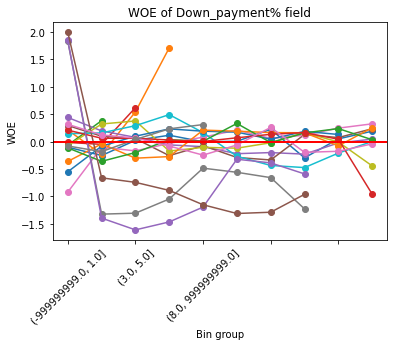

In [ ]:
WOE_dict=dict()
nbins = {'Debit ACNO':10, 'CATEGORYID':10,
       'CATNAME':10, 'CRD_PURPOSE':10, 'CRLIMIT':10, 'NORMAL_PRINCIPAL_AMT':10,
       'PRINCIPAL_AMT':10, 
       'DUE_AMT_OF_PRINCIPAL':10, 'INTEREST_PAID':10, 'INTEREST_RECEIVABLE':10,
       'TOTAL_PAID':10, 'NRC_NO':10,  'DEALER_NAME':10, 
        'LAST_REPAYMENT_AMOUNT':10, 'PI':10,
       'FEE_OUTSTANDING':10, 'ORIGINAL_AMT':10,
       'Down_payment%':10}
for (col, bins) in nbins.items():
  df_summary, IV, thres = _WOE(df, colname=col, n_bins=bins)
  WOE_dict[col] = {'table':df_summary, 'IV':IV}
  _plot(df_summary)

In [ ]:
columns = []
IVs = []
for col in df.columns:
  if col != 'NPL_STATUS':
    columns.append(col)
    IVs.append(WOE_dict[col]['IV'])
df_WOE = pd.DataFrame({'column': columns, 'IV': IVs})

def _rank_IV(iv):
  if iv <= 0.02:
    return 'Useless'
  elif iv <= 0.1:
    return 'Weak'
  elif iv <= 0.3:
    return 'Medium'
  elif iv <= 0.5:
    return 'Strong'
  else:
    return 'Suspicious'

df_WOE['rank']=df_WOE['IV'].apply(lambda x: _rank_IV(x))
df_WOE.sort_values('IV', ascending=False)

,column,IV,rank
15,FEE_OUTSTANDING,1.732529,Suspicious
14,PI,1.650235,Suspicious
7,DUE_AMT_OF_PRINCIPAL,1.539138,Suspicious
1,CATEGORYID,0.107294,Medium
6,PRINCIPAL_AMT,0.099285,Weak
9,INTEREST_RECEIVABLE,0.091167,Weak
13,LAST_REPAYMENT_AMOUNT,0.087019,Weak
10,TOTAL_PAID,0.074777,Weak
8,INTEREST_PAID,0.052475,Weak
11,NRC_NO,0.049150,Weak


In [ ]:
for col in WOE_dict.keys():
  try:
    key = list(WOE_dict[col]['table']['WOE'].index)
    woe = list(WOE_dict[col]['table']['WOE'])
    d = dict(zip(key, woe))
    col_woe = col+'_WOE'
    df[col_woe] = df[col].map(d)
  except:
    print(col)

In [ ]:
X = df.filter(like='_WOE', axis = 1)
# can delete some useless variables (total_day_calls,total_night_calls...)
y = df['NPL_STATUS']

#model: Logistics Regression


In [ ]:
ids = np.arange(X.shape[0])
X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(X, y, ids, test_size = 0.2, stratify = y, shuffle = True, random_state = 123)

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (11656, 18)
X_test shape:  (2914, 18)
y_train shape:  (11656,)
y_test shape:  (2914,)


In [ ]:
logit_model = LogisticRegression(solver = 'lbfgs', max_iter=1000, fit_intercept=True, tol=0.0001, C=1, penalty='l2')
logit_model.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=1000)

In [ ]:
y_pred_train = logit_model.predict(X_train)
acc_train = accuracy_score(y_pred_train, y_train)
y_pred_test = logit_model.predict(X_test)
acc_test = accuracy_score(y_pred_test, y_test)

print('accuracy on train: ', acc_train)
print('accuracy on test: ', acc_test)

accuracy on train:  0.8373369938229238
accuracy on test:  0.8438572409059711


#curve

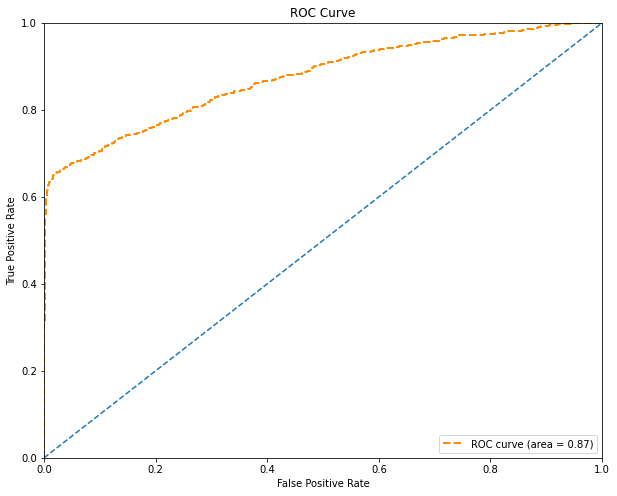

In [ ]:
y_pred_prob_test = logit_model.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

def _plot_roc_curve(fpr, tpr, thres, auc):
    plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('ROC Curve')

_plot_roc_curve(fpr, tpr, thres, roc_auc)

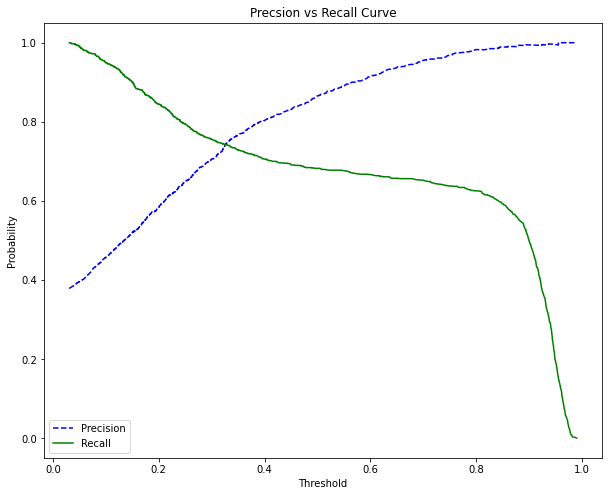

In [ ]:
precision, recall, thres = precision_recall_curve(y_test, y_pred_prob_test)

def _plot_prec_rec_curve(prec, rec, thres):
    plt.figure(figsize = (10, 8))
    plt.plot(thres, prec[:-1], 'b--', label = 'Precision')
    plt.plot(thres, rec[:-1], 'g-', label = 'Recall')
    plt.xlabel('Threshold')
    plt.ylabel('Probability')
    plt.title('Precsion vs Recall Curve')
    plt.legend()

_plot_prec_rec_curve(precision, recall, thres)

In [ ]:
def _KM(y_pred, n_bins):
  _, thresholds = pd.qcut(y_pred, q=n_bins, retbins=True)
  cmd_BAD = []
  cmd_GOOD = []
  BAD_id = set(np.where(y_test == 0)[0])
  GOOD_id = set(np.where(y_test == 1)[0])
  total_BAD = len(BAD_id)
  total_GOOD = len(GOOD_id)
  for thres in thresholds:
    pred_id = set(np.where(y_pred <= thres)[0])
    # Đếm % số lượng hồ sơ BAD có xác suất dự báo nhỏ hơn hoặc bằng thres
    per_BAD = len(pred_id.intersection(BAD_id))/total_BAD
    cmd_BAD.append(per_BAD)
    # Đếm % số lượng hồ sơ GOOD có xác suất dự báo nhỏ hơn hoặc bằng thres
    per_GOOD = len(pred_id.intersection(GOOD_id))/total_GOOD
    cmd_GOOD.append(per_GOOD)
  cmd_BAD = np.array(cmd_BAD)
  cmd_GOOD = np.array(cmd_GOOD)
  return cmd_BAD, cmd_GOOD, thresholds

cmd_BAD, cmd_GOOD, thresholds = _KM(y_pred_prob_test, n_bins=20)

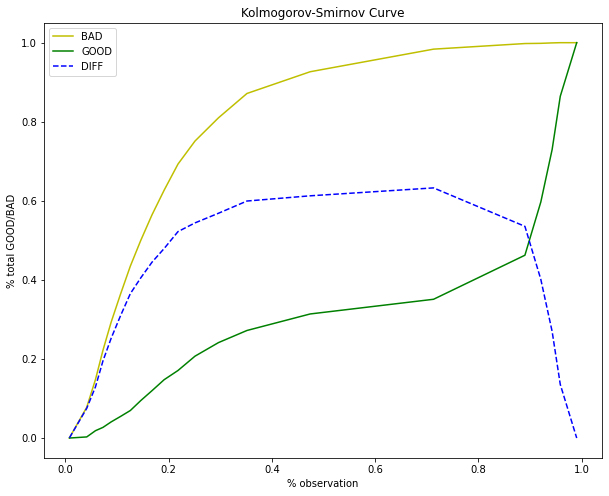

In [ ]:
def _plot_KM(cmd_BAD, cmd_GOOD, thresholds):
  plt.figure(figsize = (10, 8))
  plt.plot(thresholds, cmd_BAD, 'y-', label = 'BAD')
  plt.plot(thresholds, cmd_GOOD, 'g-', label = 'GOOD')
  plt.plot(thresholds, cmd_BAD-cmd_GOOD, 'b--', label = 'DIFF')
  plt.xlabel('% observation')
  plt.ylabel('% total GOOD/BAD')
  plt.title('Kolmogorov-Smirnov Curve')
  plt.legend()

_plot_KM(cmd_BAD, cmd_GOOD, thresholds)

In [ ]:
stats.ks_2samp(cmd_BAD, cmd_GOOD)

KstestResult(statistic=0.5238095238095238, pvalue=0.005467427576534314)

# credit score

In [ ]:
def _CreditScore(beta, alpha, woe, n = 12, odds = 1/4, pdo = -50, thres_score = 600):
  factor = pdo/np.log(2)
  offset = thres_score - factor*np.log(odds)
  score = (beta*woe+alpha/n)*factor+offset/n
  return score

_CreditScore(beta = 0.5, alpha = -1, woe = 0.15, n = 12)

42.2677896003704

In [ ]:
betas_dict = dict(zip(list(X_train.columns), logit_model.coef_[0]))
alpha = logit_model.intercept_[0]
betas_dict

{'Debit ACNO_WOE': 0.47733428103422204,
 'CATEGORYID_WOE': 0.9091354845724754,
 'CATNAME_WOE': -0.7992817232599241,
 'CRD_PURPOSE_WOE': -0.21145524641697155,
 'CRLIMIT_WOE': -0.05867866126673958,
 'NORMAL_PRINCIPAL_AMT_WOE': 0.11388251666694067,
 'PRINCIPAL_AMT_WOE': 0.5919026512585635,
 'DUE_AMT_OF_PRINCIPAL_WOE': 0.4576413982450712,
 'INTEREST_PAID_WOE': 0.7673056286346144,
 'INTEREST_RECEIVABLE_WOE': 0.8070140703724116,
 'TOTAL_PAID_WOE': 0.3757959703386342,
 'NRC_NO_WOE': 0.6604948873390634,
 'DEALER_NAME_WOE': 0.3942749941965506,
 'LAST_REPAYMENT_AMOUNT_WOE': 0.5520654744895656,
 'PI_WOE': 0.47273058380422117,
 'FEE_OUTSTANDING_WOE': 0.5777786826603997,
 'ORIGINAL_AMT_WOE': 1.0503012842981223,
 'Down_payment%_WOE': 0.16790341671183648}

In [ ]:
cols = []
features = []
woes = []
betas = []
scores = []

for col in columns:
  for feature, woe in WOE_dict[col]['table']['WOE'].to_frame().iterrows():
      cols.append(col)
      # Add feature
      feature = str(feature)
      features.append(feature)    
      # Add woe
      woe = woe.values[0]
      woes.append(woe)
      # Add beta
      col_woe = col+'_WOE'
      beta = betas_dict[col_woe]
      betas.append(beta)
      # Add score
      score = _CreditScore(beta = beta, alpha = alpha, woe = woe, n = 12)
      scores.append(score)

df_WOE = pd.DataFrame({'Columns': cols, 'Features': features, 'WOE': woes, 'Betas':betas, 'Scores':scores})
df_WOE.head()

,Columns,Features,WOE,Betas,Scores
0,Debit ACNO,"(-999999999.0, 1456.9]",-0.100641,0.477334,47.591398
1,Debit ACNO,"(1456.9, 2913.8]",-0.252897,0.477334,52.833914
2,Debit ACNO,"(2913.8, 4370.7]",0.024370,0.477334,43.286977
3,Debit ACNO,"(4370.7, 5827.6]",0.117021,0.477334,40.096758
4,Debit ACNO,"(5827.6, 7284.5]",-0.002062,0.477334,44.197085


In [ ]:
# test
test_obs = df[columns].iloc[0:1, :]
test_obs

,Debit ACNO,CATEGORYID,CATNAME,CRD_PURPOSE,CRLIMIT,NORMAL_PRINCIPAL_AMT,PRINCIPAL_AMT,DUE_AMT_OF_PRINCIPAL,INTEREST_PAID,INTEREST_RECEIVABLE,TOTAL_PAID,NRC_NO,DEALER_NAME,LAST_REPAYMENT_AMOUNT,PI,FEE_OUTSTANDING,ORIGINAL_AMT,Down_payment%
0,1,17,26,3,4011,2047,4887,1598,5967,5721,4460,784,234,9496,1737,773,4065,5


In [ ]:
def _search_score(obs, col):
  feature = [str(inter) for inter in list(WOE_dict[col]['table'].index) if obs[col].values[0] in inter][0]
  score = df_WOE[(df_WOE['Columns'] == col) & (df_WOE['Features'] == feature)]['Scores'].values[0]
  return score

def _total_score(obs, columns = columns):
  scores = dict()
  for col in columns:
    scores[col] = _search_score(obs, col)
  total_score = sum(scores.values())
  return scores, total_score

scores, total_score = _total_score(test_obs)

print(_total_score(test_obs))

({'Debit ACNO': 47.59139754854678, 'CATEGORYID': 30.135593451420696, 'CATNAME': 66.21457115014016, 'CRD_PURPOSE': 43.90280633893269, 'CRLIMIT': 44.026303559263205, 'NORMAL_PRINCIPAL_AMT': 43.306280929564004, 'PRINCIPAL_AMT': 40.60346075900941, 'DUE_AMT_OF_PRINCIPAL': 87.77757755120601, 'INTEREST_PAID': 49.8643338147901, 'INTEREST_RECEIVABLE': 34.491032208612694, 'TOTAL_PAID': 37.80285750602498, 'NRC_NO': 61.29970819354678, 'DEALER_NAME': 43.12072889316406, 'LAST_REPAYMENT_AMOUNT': 37.534896300041844, 'PI': 91.68319956391701, 'FEE_OUTSTANDING': -39.12745093452114, 'ORIGINAL_AMT': 57.40631400274182, 'Down_payment%': 43.64188279290511}, 821.2754936293062)


In [ ]:
total_scores = []
data_test = df.iloc[id_test].copy()
for i in np.arange(data_test[columns].shape[0]):
  obs = data_test[columns].iloc[i:(i+1), :]
  _, score = _total_score(obs)
  total_scores.append(score)

data_test['Score'] = total_scores

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Distribution Score in Default vs Non-Default')

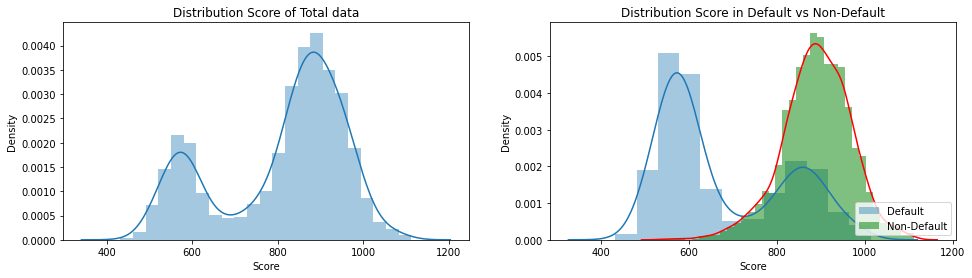

In [ ]:
plt.figure(figsize=(16, 4))
plt.subplot(121)
sns.distplot(data_test['Score'])
plt.title('Distribution Score of Total data')
plt.subplot(122)
sns.distplot(data_test[data_test['NPL_STATUS']==1]['Score'], label='Default')
sns.distplot(data_test[data_test['NPL_STATUS']==0]['Score'], label='Non-Default', 
             kde_kws={"color": "r"}, 
             hist_kws={"color": "g", "alpha":0.5})
plt.legend(loc = 'lower right')
plt.title('Distribution Score in Default vs Non-Default')